# Netflix and Chill   - Data Analysis
 This pandemic situation has led the world towards digitalization. In this situation many OTT platforms have faced a boon in terms of users. One buzz word we all might have heard in this situation is "Netflix and Chill."

 So...

What is Netflix?


Netflix is the world's leading streaming entertainment service with 193 million paid memberships in over 190 countries enjoying TV series, documentaries and feature films across a wide variety of genres and languages. Members can watch as much as they want, anytime, anywhere, on any internet-connected screen. Members can play, pause and resume watching, all without commercials or commitments.


This is an exploratory analysis of Netflix. To find out what is the factors contributing in making it such a popular and famous streaming service.


The data set used is Netflix-show from www.kaggle.com.

This analysis is an outcome from the course... Data Analysis with Python: Zero to Pandas (zerotopandas.com),where I have learned different tools and technique like Python, Numpy,Pandas , Seaborn ,matplotlib, etc.




## Downloading the Dataset

In order to proceed for the analysis, we are first suppose to download the dataset.

Here we have downloaded the dataset using the opendatasets Python Library

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sakshikhanapure
Your Kaggle Key: ········


100%|██████████| 971k/971k [00:00<00:00, 84.4MB/s]

The dataset has been downloaded and extracted.

In [4]:

data_dir = './netflix-shows'

In [5]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

In [6]:
project_name = "netflix-movies-and-shows-course-project-" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "sakshi-khanapure/netflix-movies-and-shows-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sakshi-khanapure/netflix-movies-and-shows-course-project


'https://jovian.ml/sakshi-khanapure/netflix-movies-and-shows-course-project'

## Data Preparation and Cleaning

* The first step of data analysis after downloading the data set is to prepare the data set.

* Here we Load the dataset into a data frame using Pandas

* We explore the number of rows & columns, ranges of values, etc.

* Handle missing, incorrect and invalid data



In [10]:
import pandas as pd

In [11]:
netflix_raw_df=pd.read_csv(data_dir+"/netflix_titles.csv")

In [12]:
netflix_raw_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [13]:
netflix_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [14]:
netflix_raw_df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [15]:
netflix_raw_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [40]:
selected_columns=['title','type','director','cast','country','rating','release_year','listed_in','duration']

In [41]:
len(selected_columns)

9

In [42]:
netflix_df=netflix_raw_df[selected_columns].copy()

In [43]:
netflix_df

,title,type,director,cast,country,rating,release_year,listed_in,duration
0,Norm of the North: King Sized Adventure,Movie,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",TV-PG,2019,"Children & Family Movies, Comedies",90 min
1,Jandino: Whatever it Takes,Movie,NaN,Jandino Asporaat,United Kingdom,TV-MA,2016,Stand-Up Comedy,94 min
2,Transformers Prime,TV Show,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,TV-Y7-FV,2013,Kids' TV,1 Season
3,Transformers: Robots in Disguise,TV Show,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,TV-Y7,2016,Kids' TV,1 Season
4,#realityhigh,Movie,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,TV-14,2017,Comedies,99 min
...,...,...,...,...,...,...,...,...,...
6229,Red vs. Blue,TV Show,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NR,2015,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",13 Seasons
6230,Maron,TV Show,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,TV-MA,2016,TV Comedies,4 Seasons
6231,Little Baby Bum: Nursery Rhyme Friends,Movie,NaN,NaN,NaN,NaN,2016,Movies,60 min
6232,A Young Doctor's Notebook and Other Stories,TV Show,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,TV-MA,2013,"British TV Shows, TV Comedies, TV Dramas",2 Seasons


In [44]:
netflix_df.shape

(6234, 9)

In [45]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         6234 non-null   object
 1   type          6234 non-null   object
 2   director      4265 non-null   object
 3   cast          5664 non-null   object
 4   country       5758 non-null   object
 5   rating        6224 non-null   object
 6   release_year  6234 non-null   int64 
 7   listed_in     6234 non-null   object
 8   duration      6234 non-null   object
dtypes: int64(1), object(8)
memory usage: 438.5+ KB


In [46]:
netflix_df.describe()

,release_year
count,6234.00000
mean,2013.35932
std,8.81162
min,1925.00000
25%,2013.00000
50%,2016.00000
75%,2018.00000
max,2020.00000


In [47]:
netflix_df['listed_in'].value_counts()

Documentaries                                                  299
Stand-Up Comedy                                                273
Dramas, International Movies                                   248
Dramas, Independent Movies, International Movies               186
Comedies, Dramas, International Movies                         174
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
Classic & Cult TV, Crime TV Shows, TV Dramas                     1
Comedies, Dramas, Music & Musicals                               1
Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy       1
Docuseries, Spanish-Language TV Shows                            1
Name: listed_in, Length: 461, dtype: int64

In [48]:
netflix_df.sample(10)

,title,type,director,cast,country,rating,release_year,listed_in,duration
1113,My Little Pony Friendship Is Magic: Best Gift ...,Movie,"Denny Lu, Mike Myhre","Tara Strong, Andrea Libman, Ashleigh Ball, Cat...",United States,TV-Y,2018,Children & Family Movies,44 min
771,Blood Pact,TV Show,NaN,"Guilherme Fontes, Ravel Cabral, Jonathan Haage...",Brazil,TV-MA,2018,"Crime TV Shows, International TV Shows, TV Dramas",1 Season
4814,Like Father,Movie,Lauren Miller Rogen,"Kristen Bell, Kelsey Grammer, Seth Rogen, Paul...",United States,TV-MA,2018,"Comedies, Dramas",104 min
2529,Hikaru Utada Laughter in the Dark Tour 2018,Movie,NaN,Hikaru Utada,Japan,TV-PG,2018,"International Movies, Music & Musicals",141 min
2689,My Little Baby,TV Show,NaN,"Ji-ho Oh, Soo-kyung Lee, Min-jae Kim, Ji-hyun Nam",South Korea,TV-14,2016,"Crime TV Shows, International TV Shows, Korean...",1 Season
2784,The Legacy of a Whitetail Deer Hunter,Movie,Jody Hill,"Josh Brolin, Danny McBride, Montana Jordan, Sc...",United States,TV-14,2018,"Action & Adventure, Comedies, Dramas",83 min
4703,Back to 1989,TV Show,NaN,"Marcus Chang, Ivy Shao, Mini Tsai, Yorke Sun, ...",Taiwan,TV-14,2016,"International TV Shows, Romantic TV Shows, TV ...",1 Season
5584,Ripper Street,TV Show,NaN,"Matthew Macfadyen, Jerome Flynn, Adam Rothenbe...","United Kingdom, Ireland",TV-MA,2017,"British TV Shows, Crime TV Shows, TV Dramas",5 Seasons
4745,The Naked Director,TV Show,NaN,"Takayuki Yamada, Shinnosuke Mitsushima, Tetsuj...",Japan,TV-MA,2019,"International TV Shows, TV Dramas",1 Season
4370,The Little Hours,Movie,Jeff Baena,"Alison Brie, Dave Franco, Kate Micucci, Aubrey...","Canada, United States",R,2017,"Comedies, Independent Movies",89 min


In [49]:
netflix_df['country'].value_counts()

United States                            2032
India                                     777
United Kingdom                            348
Japan                                     176
Canada                                    141
                                         ... 
United Kingdom, South Korea                 1
Argentina, Chile                            1
Denmark, Zimbabwe                           1
France, Belgium, China, United States       1
Uruguay, Spain, Mexico                      1
Name: country, Length: 554, dtype: int64

In [67]:
import jovian

In [68]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sakshi-khanapure/netflix-movies-and-shows-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sakshi-khanapure/netflix-movies-and-shows-course-project


'https://jovian.ml/sakshi-khanapure/netflix-movies-and-shows-course-project'

## Exploratory Analysis and Visualization

* It is the best practice to get a view of data by actually visualizing the data 

* Here in this section we try to explore relationship between columns using scatter plots, bar charts, etc.

* We make a note of interesting insights from the exploratory analysis to use it to summarize our final report.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

 **Movie Vs TV Shows**

First we might want to understand the different types in which Netflix provide entertainment.

The names of type and their respective count.


In [29]:
netflix_df.type.nunique()

2

In [30]:
netflix_df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

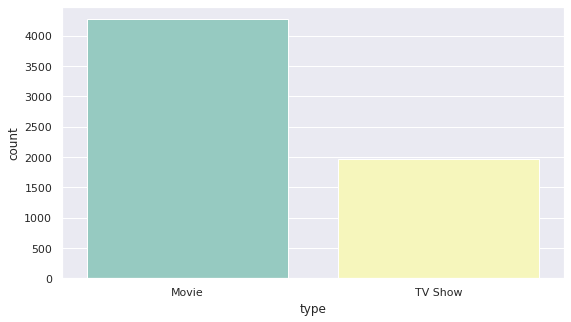

In [31]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_df, palette="Set3")

**Analysis of Movie rating** 



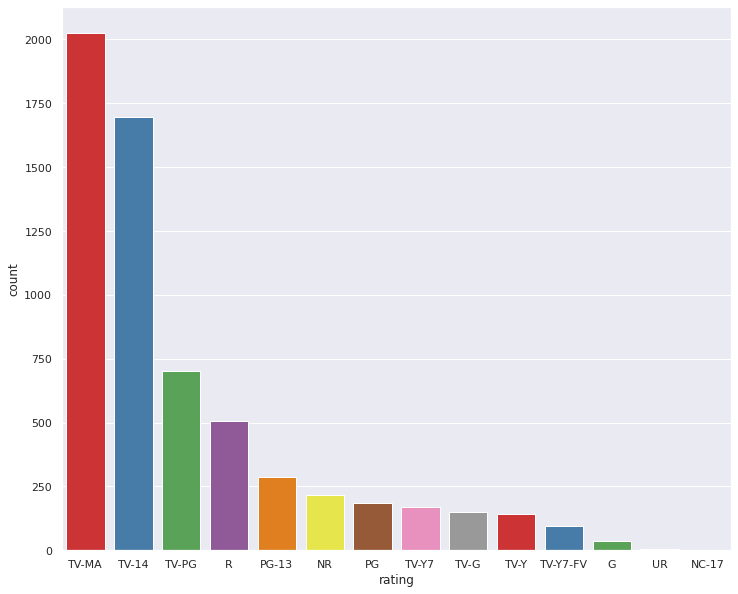

In [32]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_df, palette="Set1", order=netflix_df['rating'].value_counts().index[0:15])

**Yearwise analysis** 


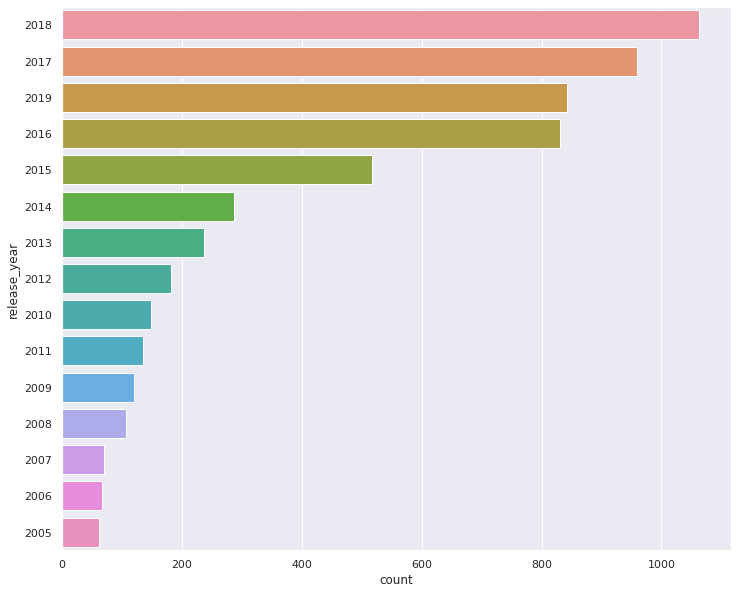

In [33]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_df, order=netflix_df['release_year'].value_counts().index[0:15])

**Genre** 

Let's find out which Genre of Movies & Tv Shows Netflix Provides the Most.




In [34]:
top_listed_in=netflix_df["listed_in"].value_counts()[0:25]
top_listed_in.head()

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Name: listed_in, dtype: int64

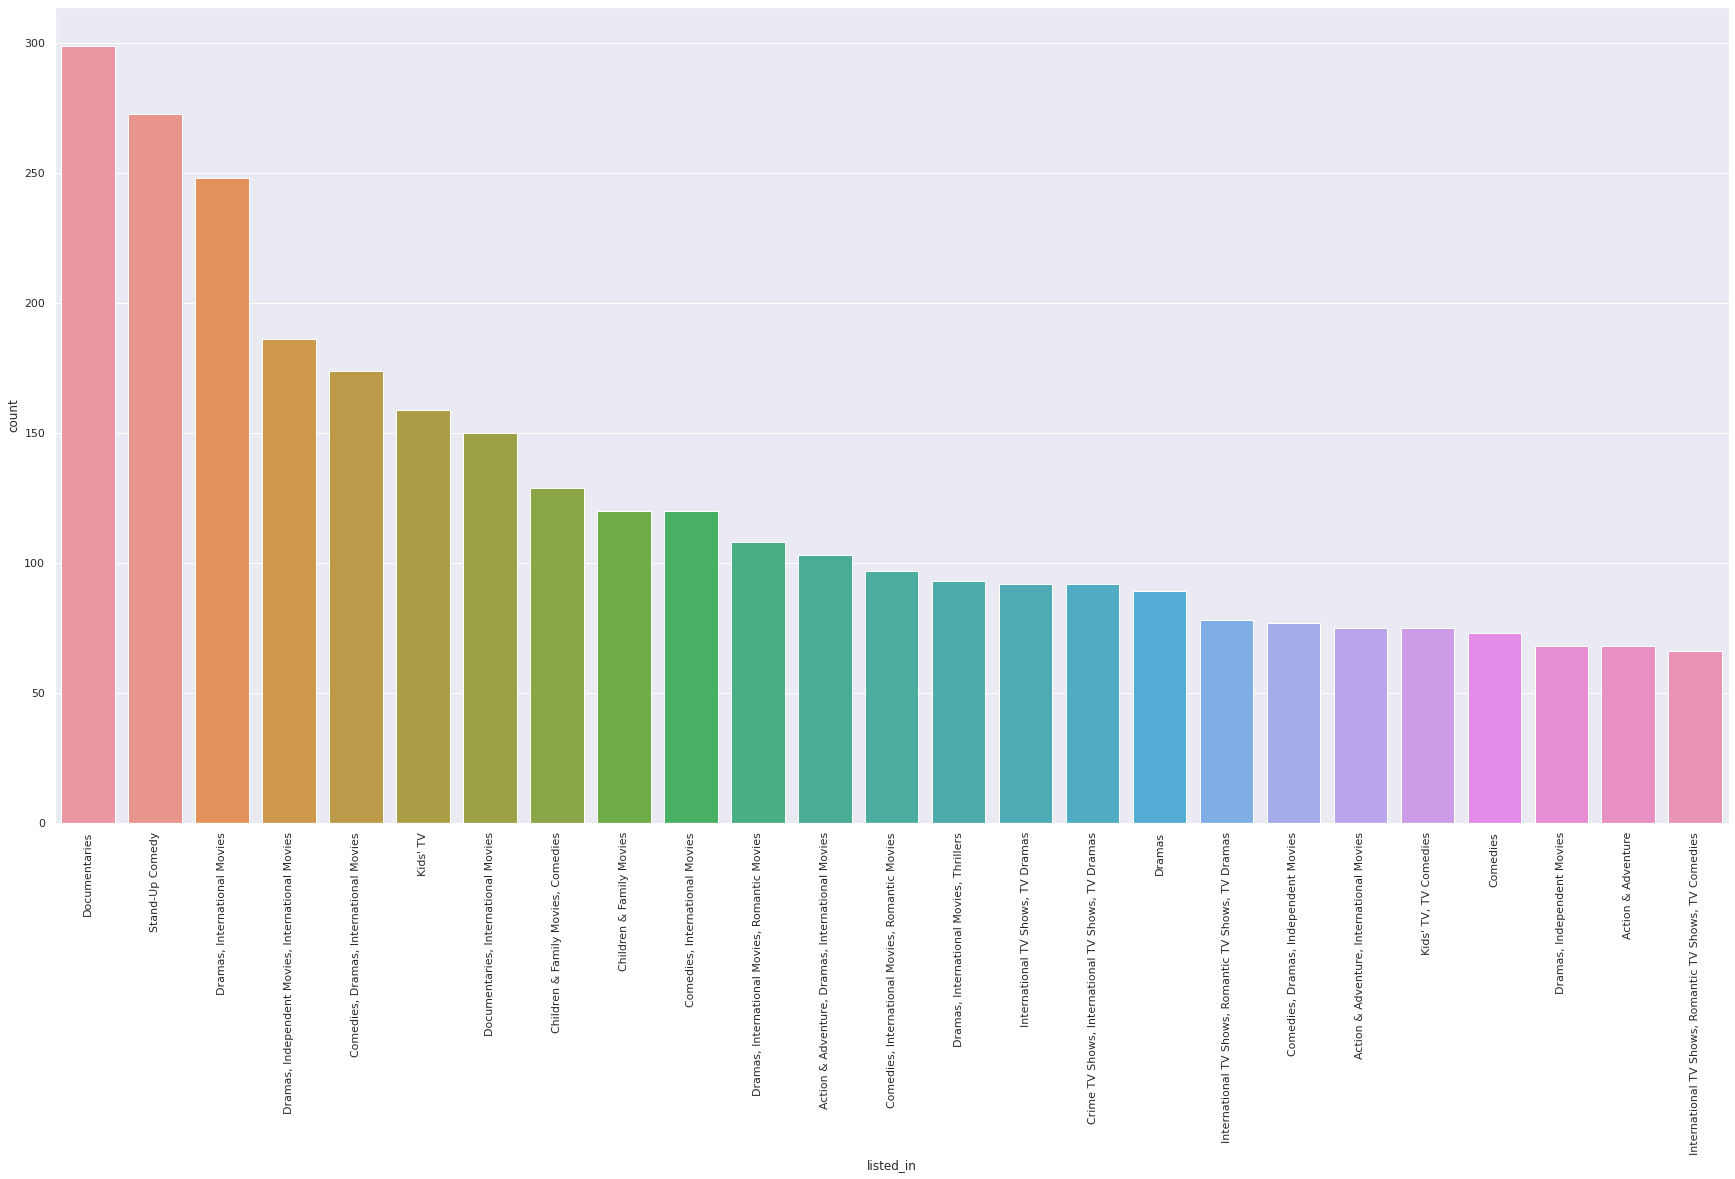

In [35]:
sns.set()
plt.figure(figsize=(30,15))
sns.countplot(x='listed_in',data = netflix_df,order =netflix_df["listed_in"].value_counts().index[0:25])
plt.xticks(rotation = 90)
plt.show()


**Understanding Relation Between Genre and rating** 


Let's find out which genre Movies/Tv shows get the most amount of rating, by which rating.

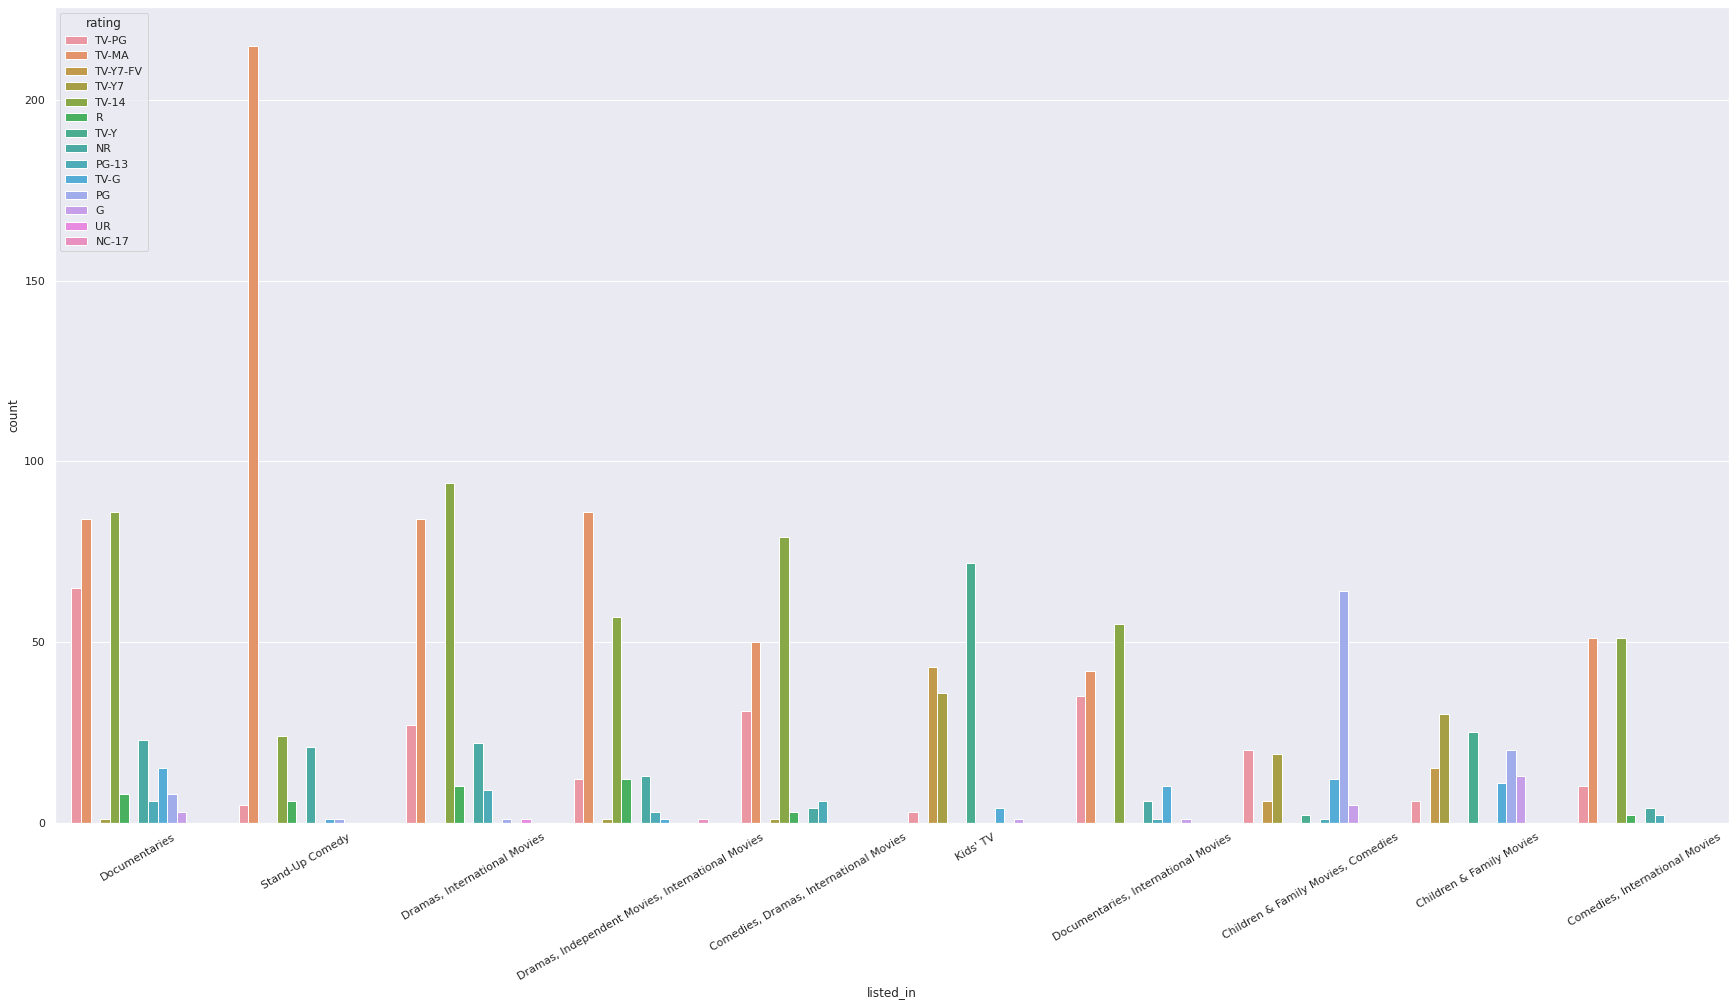

In [36]:
sns.set()
plt.figure(figsize=(30,15))
sns.countplot(x='listed_in',hue='rating',data = netflix_df,order =netflix_df["listed_in"].value_counts().index[0:10])
plt.xticks(rotation = 30)
plt.show()

In [73]:
import jovian

In [74]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sakshi-khanapure/netflix-movies-and-shows-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sakshi-khanapure/netflix-movies-and-shows-course-project


'https://jovian.ml/sakshi-khanapure/netflix-movies-and-shows-course-project'

## Asking and Answering Questions
With the help of analysis so for and also by exploring different techniques.

Let's try to answer some interesting questions.



#### Q1: Which are oldest movies on Netflix? List 15 oldest movies available.


In [52]:
small = netflix_df.sort_values("release_year", ascending = True)
small = small[small['duration'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
4292,Pioneers: First Women Filmmakers*,1925
2011,Prelude to War,1942
2013,The Battle of Midway,1942
2022,Undercover: How to Operate Behind Enemy Lines,1943
2023,Why We Fight: The Battle of Russia,1943
2026,WWII: Report from the Aleutians,1943
2017,The Memphis Belle: A Story of a\nFlying Fortress,1944
2019,The Negro Soldier,1944
2021,Tunisian Victory,1944
2012,San Pietro,1945


#### Q2:   What are the top 10 Genres of Movies?

Text(0.5, 1.0, 'Top 10 Genres of Movies')

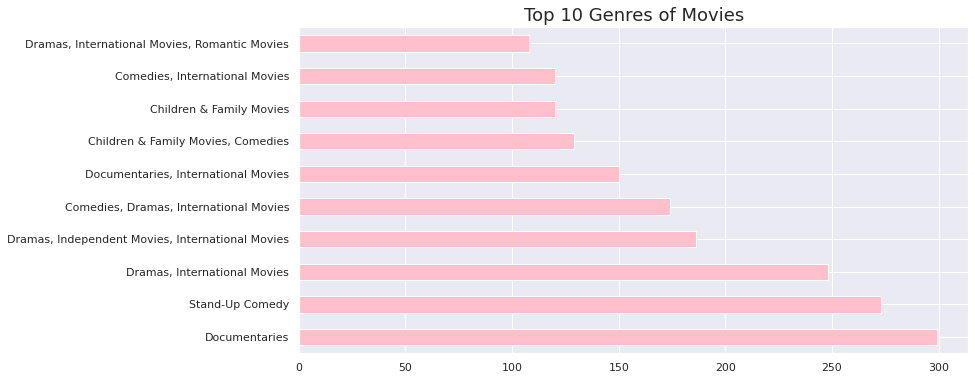

In [55]:
plt.figure(figsize=(12,6))
netflix_df[netflix_df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="pink")
plt.title("Top 10 Genres of Movies",size=18)

#### Q3:  Frequency of TV shows which were released in different years and are available on Netflix?

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

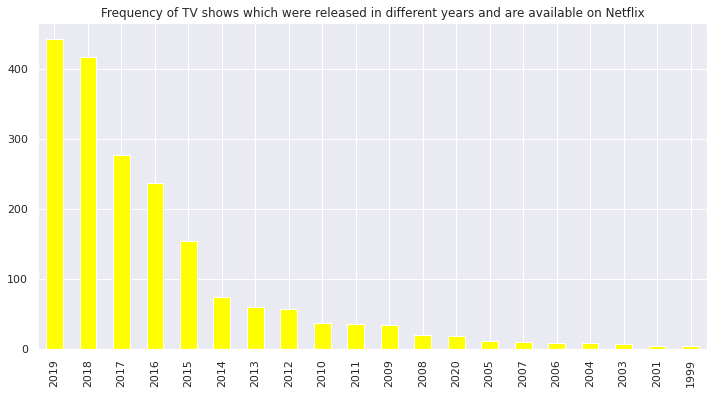

In [56]:
plt.figure(figsize=(12,6))
netflix_df[netflix_df["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="yellow")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

#### Q4: What is the percentage of movies available on netflix?

<AxesSubplot:ylabel='type'>

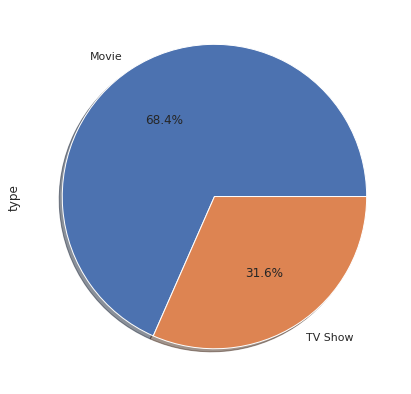

In [63]:
plt.figure(figsize=(14,7))
netflix_df["type"].value_counts().plot(kind="pie",shadow=True,autopct = '%1.1f%%')

#### Q5: Which are the top 20 countries in terms of maximum number of movies on netflix?

Text(0.5, 1.0, 'Top 20 countries in terms of maximum number of movies on netflix')

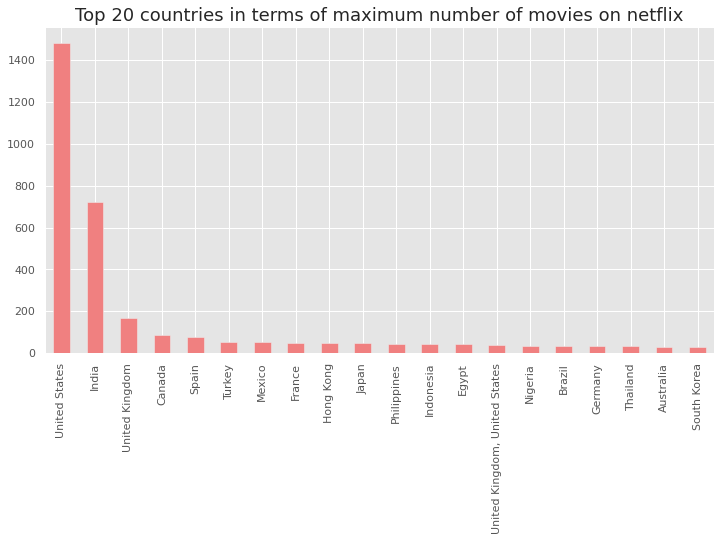

In [64]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
netflix_df[netflix_df["type"]=="Movie"]["country"].value_counts()[:20].plot(kind="bar",color="lightcoral")
plt.title("Top 20 countries in terms of maximum number of movies on netflix",size=18)


In [1]:
import jovian

In [2]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "sakshi-khanapure/netflix-movies-and-shows-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sakshi-khanapure/netflix-movies-and-shows-course-project


'https://jovian.ml/sakshi-khanapure/netflix-movies-and-shows-course-project'

## Inferences and Conclusion




From the analysis we have done the following points I would like to summarize:

1. Netflix offers entertainment in two types...Movies and Tv show.
   The number of movies available on Netflix is more than Tv Shows.

2. The highest rated movies on Netflix falls under TV-MA category;
   So the highest no of movies are suitable for mature adult audiences and may be unsuitable for children under 17.

3. According to Year wise analysis it is observed that the contents have been gradually increasing over years
   The maximum count is observed in year 2018.

4. Genre of Movies &amp; Tv Shows Netflix Provides the Most is Documentaries, followed by Stand-Up Comedy, Dramas,       International Movies, etc.

5. The genre Movies,Tv shows get the most amount of rating is Standup comedies and the rating is TV-MA.

6. The oldest movie available on Netflix is Pioneers: First Women Filmmakers, which was released in 1925.

7. The percentage of movies available on Netflix is 68.4% and Tv show available is 31.6%.

8. The top countries in terms of maximum number of movies on Netflix include US, India, UK, Canada, Spain.



I would like to conclude by saying that because of all the above factors Netflix is one of the Top Streaming Service platform available.


In [5]:
import jovian

In [6]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sakshi-khanapure/netflix-movies-and-shows-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sakshi-khanapure/netflix-movies-and-shows-course-project


'https://jovian.ml/sakshi-khanapure/netflix-movies-and-shows-course-project'

## References and Future Work


With the help of the data set one can find out at what time movies are realized to gain more attraction; One can find out about which directors work on what type of a genre and much more.

References https://about.netflix.com/en/about-us

https://www.kaggle.com/jl18pg052/netflix-data-analysis

In [1]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>